In [17]:
import vanna
from vanna.remote import VannaDefault
import psycopg2
from dotenv import load_dotenv
import os

# Setup

In [18]:
load_dotenv('.env', override=True)
VANNA_KEY = os.getenv('VANNA_KEY')
VANNA_MODEL_NAME = os.getenv('VANNA_MODEL_NAME')
DB_SERVER = os.getenv('DB_SERVER')
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')

# Set Model

In [19]:
vanna_model_name = VANNA_MODEL_NAME
vn = VannaDefault(model=vanna_model_name, api_key=VANNA_KEY)

# Connect to the Database

In [20]:
vn.connect_to_postgres(DB_SERVER,DB_NAME,DB_USER,DB_PASSWORD,DB_PORT)

# Questions


--------------------------------

[QUESTION]: Group the amount of people that each business entity have 

[QUERY]:
SELECT b.businessentityid, COUNT(p.businessentityid) AS total_people
FROM person.businessentity b
JOIN person.person p ON b.businessentityid = p.businessentityid
GROUP BY b.businessentityid;


,businessentityid,total_people
0,11233,1
1,4790,1
2,3936,1
3,18803,1
4,12502,1
...,...,...
19967,19812,1
19968,4035,1
19969,9180,1
19970,4827,1


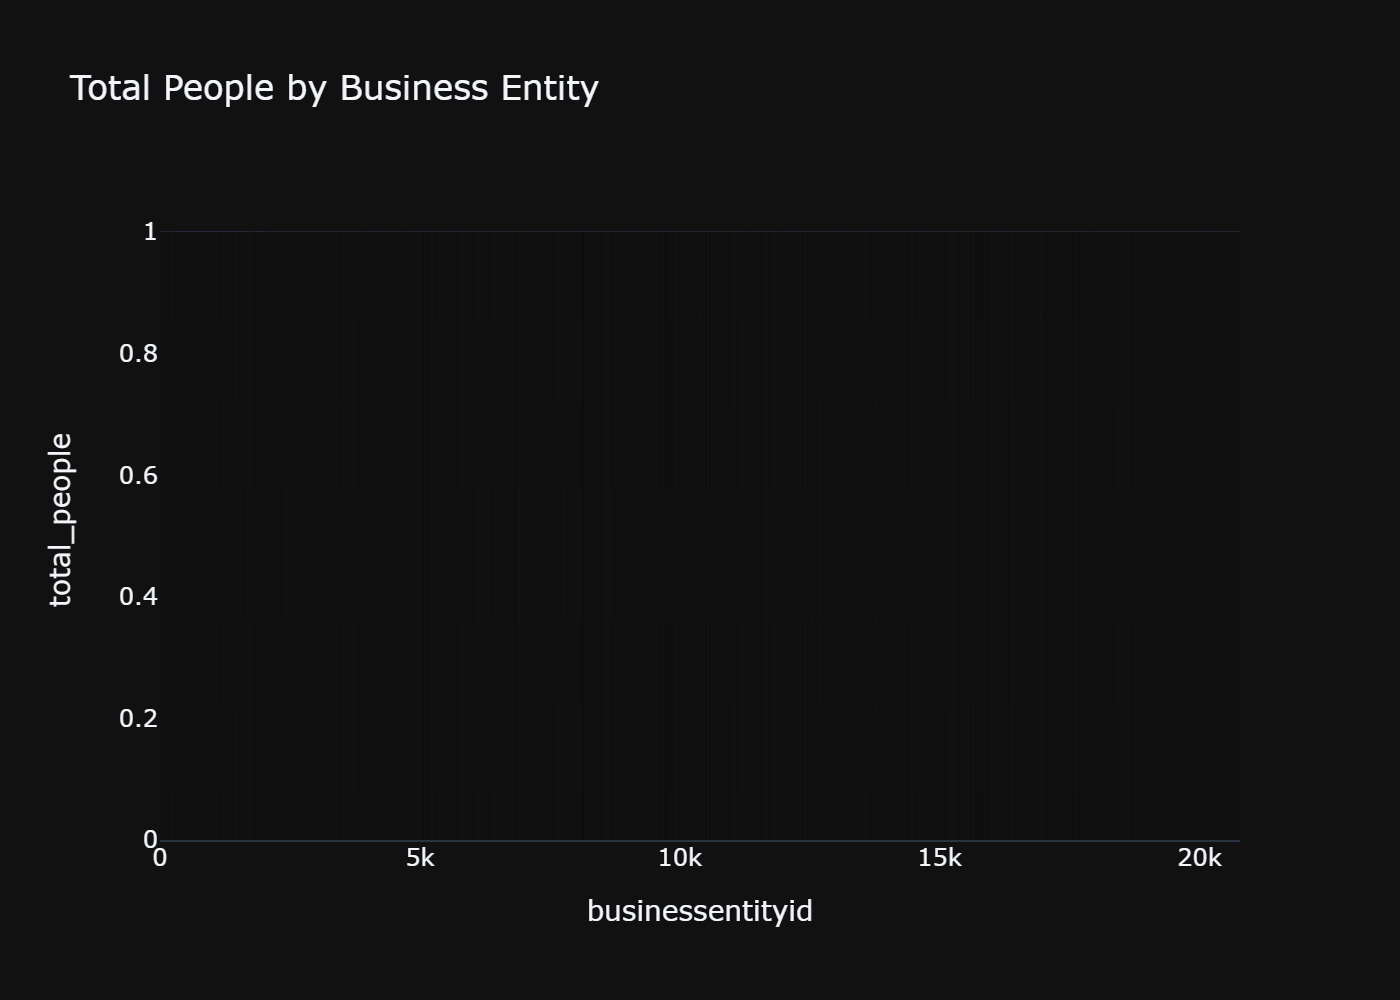

In [41]:
questions = [
    # "What it the total amount of people by region?", # Succeed
    "Group the amount of people that each business entity have", #
    # "Give me the total amount of products by category", #fails, missed schema on join
    # "What is the total amount from sales?", #fails, missed schama and wrong tables
    # "What is the total profit?", #fails, missed schema and wrong tables
    # "What is the total cost amount of all the products?", #fails, missed schema and wrong tables
    # "What is the average sales per customers?", #fails, missed schema and wrong tables
    # "What is the number of products in each category?", #fails, missed schema and wrong tables
    # "Top 10 Customers with the highest purchase", #fails, missed schema and wrong tables
    # "Top 10 Employees with the highest sale", #fails, missed schema and wrong tables
    # "Top 10 most sale products", #fails, missed schema and wrong tables
    # "Top 10 Employees with the highest sale", #fails, missed schema and wrong tables
    # "and what are their middlenames?",
    # "and where they live?",
    # "and what are their emails?",
    # "Rank customers by sales",
    ]
for i in range(len(questions)):
    try:
        print('\n--------------------------------\n')
        print(f'[QUESTION]: {questions[i]} \n')
        # query = vn.generate_sql(questions[i])
        print(f'[QUERY]:')
        sql_result = vn.ask(questions[i])
    except Exception as e:
        print(e.args)

